<h1> Project: Housing Evictions and Fair Market Rents in New York City</h1> <a id=7></a>
<h3> Amelia Ingram, Josh Megnauth, Rameasa Arna, and Abby Stricklan</h3>


## Table of Contents 

<div class = "alert alert-info">

1. [Introduction](#1)<br>
2. [Research Question](#2)<br>
    2.1 [Assumptions](#2.1)<br>
3. [Data](#3)<br>
    3.1 [Univariate Analysis](#3.1)<br>
    3.2 [Mapping Analysis](#3.2)<br>
4. [Data Analysis](#4)<br>
    4.1 [Bivariate Analysis](#4.1)<br>
    4.2 [Multivariate Analysis](#4.2)<br>
5. [Summary Conclusions](#5)<br>
6. [References](#6)<br>
    
</div>
<hr>

## Introduction <a id=1></a>
In the wake of the COVID-19 pandemic, New Yorkers have feared a rise in housing evictions across the city as landlords attempt to recover their losses and forcibly evict tenants.  As housing courts have reopened and the eviction deferment period is long passed, we are now seeing a rise in evictions across the city.  In this project we will attempt to test the relationship of housing evictions to a variety of neighborhood demographics including changes in the fair market housing rates (FMR) through exploratory data analysis (EDA) using data selected from the <b>Eviction Lab</b>, <b>ACS</b> and the <b>Housing and Urban Development</b> (HUD) datasets. 

In [1]:
import pandas as pd         #quick stats       
import numpy as np      #numerical functions
import matplotlib.pyplot as plt    #visualization library
import seaborn as sns    #visualization and stats

In [2]:
%matplotlib inline

In [6]:
path = 'https://evictionlab.org/uploads/newyork_monthly_2020_2021.csv'

df = pd.read_csv(path, header=0)            # read eviction data from online


## Research Questions <a id=2></a>

For this project, we wish to investigate the following question:

> <b>Q1:</b>  Is there a correlation between eviction rates and fair housing rents in New York City? <br>
> <b>Q2:</b>  Is there a correlation between eviction rates and any other demographic features of New York City neighborhoods that might indicate a further association to gentrification? <br>


The variables from the evictionlab.org dataset which will be used to answer these questions are:
> <b>DV:</b>  eviction rates<br>
> <b>IV:</b>  average fair market rent (FMR) for a 2 bedroom<br>

In order to better understand the relationship between these issues, we will experiment with several demographic control variables, including:
> - race
> - zip code
> - county
> - length of time in home


## Assumptions <a id=2.1></a>
Recent evidence produced from several housing research centers predict that there will be a strong increase in housing evictions in the New York City metropolitan area, despite the best efforts of both city and state agencies to prevent a massive rise in homelessness.  We assume that there could be some evidence of relationship between areas where eviction rates are high and rental increases that could potentially displace lower income communities and lead to further gentrification. In this case, we assume that a rise in fair market rent (FMR) will indicate displacement of low income populations from previously affordable subsidized housing. 

It is assumed that race also plays a crucial role in both eviction rates and rental rates.  

Finally, for the purposes of this research we assume that the housing market in New York City is fixed (this is a reasonable assumption given the pandemic slowdown of new building construction).
  

## Data <a id=3></a>

For this project, we are utilizing data from two datasets (evictionlab.org and HUD) that both include zip code geolocators, in order to both map and analyze the data.  We will also utilize ACS data for demographic information within each zip code.

Our first task is to read in and inspect the data.  In the eviction dataset, there are 8428 unique observations and 7 variables.  

In [7]:
df.shape                                # returns (# of rows/obs, # of columns/variables)
df.head

<bound method NDFrame.head of           type   GEOID racial_majority    month  filings_2020  filings_avg  \
0     Zip Code   10001           White  01/2020            51    55.000000   
1     Zip Code   10001           White  02/2020            23    49.333333   
2     Zip Code   10001           White  03/2020            20    48.333333   
3     Zip Code   10001           White  04/2020             0    41.666667   
4     Zip Code   10001           White  05/2020             0    42.000000   
...        ...     ...             ...      ...           ...          ...   
8724  Zip Code  sealed             NaN  01/2022             1     3.333333   
8725  Zip Code  sealed             NaN  02/2022             1    19.666667   
8726  Zip Code  sealed             NaN  03/2022             3     3.666667   
8727  Zip Code  sealed             NaN  04/2022             3     3.000000   
8728  Zip Code  sealed             NaN  05/2022             0     3.000000   

     last_updated  
0      2022-0

There are two main issues we see above.  First, the `type` variable is (according to the data dictionary for the Eviction Tracking System), "Either Census Tract or Zip Code, depending on the site. Unfortunately, address-level data is unavailable for some sites (Austin, New York City, Pittsburgh, Richmond) - in these cases, we list aggregate data based on zip code, as it is the smallest geographic grouping available." Not a big deal, but this means that mapping of this data is more generalized for New York City than it might be for other municipalities.<br>

Secondly, we can observe `GEOID` cases are essentially zip codes and a number of `GEOID` cases that are listed as "sealed".  According to the data dictionary for the Eviction Tracking System, "A modest portion of filings are reported to us with missing, incorrect, or out-of-bounds addresses. In these cases, we do not assign a Census Tract or Zip code to the case. Those cases are still included in our overall counts for a given site, but in the “get the data” data files, those cases are not listed under a tract or zip, and are instead listed at the end of the file as 'sealed'." This means that we will not be able to map those cases, although they can still be used in our analysis.<br>

The `month` variable includes both month and year data, and the `last_updated` is just the date of the data pulled from the site.  I will hold onto the month and deselect the last_updated column.  Now let's check the null counts. The `racial_majority` variable has 29 null entries.  Hopefully this won't be a problem--it is relatively low.

In [9]:
df.info(verbose=True, show_counts=True)     # returns information of each column and dtypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             8729 non-null   object 
 1   GEOID            8729 non-null   object 
 2   racial_majority  8700 non-null   object 
 3   month            8729 non-null   object 
 4   filings_2020     8729 non-null   int64  
 5   filings_avg      8729 non-null   float64
 6   last_updated     8729 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 477.5+ KB


Now let's load the fair market rental data from HUD.  This dataset includes the FMR rates of 2BR housing from 1983-2022.  This will give the option to create a time series analysis.

In [13]:
#load FMR 2BR data from local file (couldn't load it via URL--got errors of too large dataset)
path2 = '/Users/ameliaingram/Documents/My_GitHub+Repository/eviction-rent/FMR_2Bed_1983_2022_rev.csv'

df2 = pd.read_csv(path2, header=0)          # read FMR data from CSV file

In [14]:
df2.shape                                # returns (# of rows/obs, # of columns/variables)
df2.head

<bound method NDFrame.head of         fips2010      fips2000                                areaname22  \
0      100199999  1.002000e+08                        Montgomery, AL MSA   
1      100399999  1.004000e+08             Daphne-Fairhope-Foley, AL MSA   
2      100599999  1.006000e+08                        Barbour County, AL   
3      100799999  1.008000e+08  Birmingham-Hoover, AL HUD Metro FMR Area   
4      100999999  1.010000e+08  Birmingham-Hoover, AL HUD Metro FMR Area   
...          ...           ...                                       ...   
4760  7215199999  7.215200e+09  San Juan-Guaynabo, PR HUD Metro FMR Area   
4761  7215399999  7.215400e+09                             Yauco, PR MSA   
4762  7801099999  7.801100e+09                      St. Croix Island, VI   
4763  7802099999  7.802100e+09                       St. John Island, VI   
4764  7803099999  7.803100e+09                     St. Thomas Island, VI   

                   name             msa22  fmr22_2  fmr22

In order to complete the descriptive analysis for this project, I subset the variables from the Eviction dataset into a working dataframe labelled <b>df_evict</b>.  From here I will join a crosswalk dataset of Zip to Tract data (https://www.huduser.gov/portal/datasets/usps_crosswalk.html#data) and then I can join the FMR data to our df_evict dataframe.

In [19]:
#Working dataframe
#using loc to silence the SettingWithCopyError (source: Josh consultation)
df_evict = df.loc[:, ['GEOID',   # dv
          'filings_2020', 'filings_avg',    #iv
          'racial_majority', 'month',  # controls
        ]]

df_evict.info()    #confirm variables are saved into df_evict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GEOID            8729 non-null   object 
 1   filings_2020     8729 non-null   int64  
 2   filings_avg      8729 non-null   float64
 3   racial_majority  8700 non-null   object 
 4   month            8729 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 341.1+ KB


In my new df_evict dataset there are a bunch of object variables and only two numeric variables (filings_2020 and filings_avg).  I may need to investigate the month variable further to ensure they encode in the correct date type format.

In [16]:
#initial peek under the hood of the df_evict set
df_evict.head()

,GEOID,filings_2020,filings_avg,racial_majority,month
0,10001,51,55.000000,White,01/2020
1,10001,23,49.333333,White,02/2020
2,10001,20,48.333333,White,03/2020
3,10001,0,41.666667,White,04/2020
4,10001,0,42.000000,White,05/2020


In [27]:
#load the crosswalk file
from pandas import read_excel

path3 = pd.ExcelFile('/Users/ameliaingram/Documents/My_GitHub+Repository/eviction-rent/ZIP_TRACT_122021.xlsx')

my_sheet = 'Sheet1' #sheet name is at the bottom left of the excel file
df3 = pd.ExcelFile.parse(path3)    # read FMR data from xlsx file

print(df3.head())       

   zip        tract usps_zip_pref_city usps_zip_pref_state  res_ratio  \
0  683  72023830102         SAN GERMAN                  PR   0.000791   
1  683  72125840700         SAN GERMAN                  PR   0.186219   
2  683  72125840400         SAN GERMAN                  PR   0.300451   
3  683  72125840600         SAN GERMAN                  PR   0.095325   
4  683  72121960300         SAN GERMAN                  PR   0.042402   

   bus_ratio  oth_ratio  tot_ratio  
0   0.001116   0.000000   0.000800  
1   0.370536   0.381643   0.201179  
2   0.187500   0.115942   0.290308  
3   0.007812   0.000000   0.088184  
4   0.002232   0.019324   0.039435  


### Check for missing values
Before I do any initial analysis, I need to check for missing values from the dataset. In the code below, I found that the control `racial_majority` had 29 missing values, and the rest are fine.  In the context of this large dataset these are acceptable missing amounts to continue to use everything.  

Our backup control variables `month` and `GEOID` (zip code) have no missing values.  These are good.  

In [17]:
df_evict.isnull().sum()                           # returns the number of missing values for the df

GEOID               0
filings_2020        0
filings_avg         0
racial_majority    29
month               0
dtype: int64

### Initial Data Transformation
In order to make this dataset usable, we need to do some initial data transformation...

In the df_evict dataset, several `GEOID` entries are recorded as "sealed", which is problematic, so I changed it to "NaN". 

In [26]:
#Convert 'GEOID' sealed entries into NaN

df_evict['GEOID'] = df_evict.GEOID.replace('sealed', np.nan)

In [27]:
df_evict.info('GEOID')    #when I run this confirmation line, GEOID has replaced 29 'sealed' entries with NaN's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GEOID            8700 non-null   object 
 1   filings_2020     8729 non-null   int64  
 2   filings_avg      8729 non-null   float64
 3   racial_majority  8700 non-null   object 
 4   month            8729 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 341.1+ KB


I will first rename `race_majority` to `race` in order to ease analysis.  Then, I will also add `counties` to the dataset by assigning zip codes to counties and then applying those as a function to the `GEOID` info for readability in the analysis and plots.

In [28]:
#rename of race column here
df_evict = df_evict.rename(columns={'race_majority':'Race'})

df_evict.columns

Index(['GEOID', 'filings_2020', 'filings_avg', 'racial_majority', 'month'], dtype='object')

In [29]:
#function to add counties to df_evict using uszipcodes package
#install uszipcodes and load search engine
import uszipcode as us
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

#first create function of zip codes assigned to counties
def zippy(x):
    if pd.isnull(x):
        return None
    else:
        county = search.by_zipcode(int(x))['County']
        return county if county else NaN

df_evict['County'] = df_evict['GEOID'].apply(zippy)
df_evict.head()

#        for x in df_evict['GEOID']:
#            x = int(x)                          #convert to int because value is object
#            county = search.by_zipcode(x)['County'] #Module extracts the county name 
#            if x == str(county):               #The module doesn't recognize some zipcodes, thus generating None.This will skip None values.
#                str(x).assign(x, county)    #assign county to zipcode value
#                else: continue

#df_evict['county'] = df_evict['GEOID'].assign(zippy())

ModuleNotFoundError: No module named 'uszipcode'

Now the variables are ready to perform an initial analysis to present their survey results.  

## Univariate Analysis of Main Variables <a id=3.1></a>

### Variable:  filings_2020
`filings_2020` is the independent variable in this study.  The Eviction Lab data reports both filings_2020 which is a cumulative number since 2020 and filings_avg which is the average per month.  We are exploring both versions in this project.]

In [30]:
df_evict.filings_2020.describe()                          

count    8729.000000
mean       17.074923
std        40.453826
min         0.000000
25%         0.000000
50%         1.000000
75%        15.000000
max       550.000000
Name: filings_2020, dtype: float64

According to the preliminary descriptive statistics, evictions were on average 17.075 per zipcode, with a minimum of zero and a maximum of 550.  The interquartile range varied from 0 to 15 for the middle 50% of zipcodes.  

Text(0, 0.5, '# Evictions')

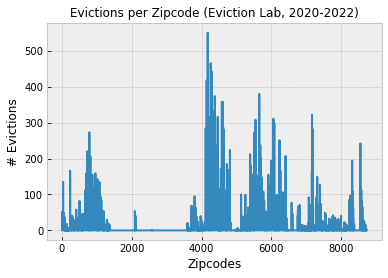

In [32]:
with plt.style.context('bmh'):      #temporary use of style sheet--source Matplotlib reference
    df_evict.filings_2020.plot(kind='line')
plt.title('Evictions per Zipcode (Eviction Lab, 2020-2022)')
plt.xlabel('Zipcodes')
plt.ylabel('# Evictions')

After viewing the histogram, it is apparent that the vast majority of evictions are happening in the midrange of all zipcodes, however there are gaps.  This leads to a heavily left-skewed plot.

In order to refine the evictions into a recognizable pattern, I will divide into five categorical levels of evictions (0, 1-9, 10-29, 30-59, 60-99, and >100). This will give a more detailed attention to the extreme ranges of evictions, in order to isolate these groups from the lower rates.

In [42]:
def evict_b(y):                                 
    '''
    INPUT: 
    y: int, from -1 to 550, the inputs of the int variable `filings_2020`
    
    OUTPUT:
    0 recoded to '<1'
    1-9 recoded to '1-9'
    10-29 recoded to '10-29'
    30-59 recoded to '30-59'
    60-99 recoded to '60-99'
    >100 recoded to '>100'
    '''
    if y == 0:
        return '0'
    if y >0 and y<10:
        return '1-9'
    elif y >= 10 and y<30:
        return '10-29'
    elif y >= 30 and y<60:
        return '30-59'
    elif y>=60 and y<100:
        return '60-99'
    elif y>=100:
        return '>100'
    else:
        return np.nan                        # missing is coded as nan 

# apply the function to `filings_2020`

df_evict['filings_cat'] = df_evict.filings_2020.apply(evict_b)

In [43]:
# double check whether the transformation is successful:

df_evict[['filings_cat']]

,filings_cat
0,30-59
1,10-29
2,10-29
3,0
4,0
...,...
8724,1-9
8725,1-9
8726,1-9
8727,1-9


Now that we have groups `filings_2020` into groups, let's see the resulting distribution. 

Text(0, 0.5, '# Evictions')

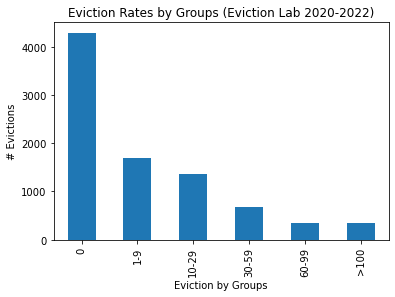

In [45]:
with plt.style.context('fast'):
    df_evict.groupby('filings_cat').size().plot(kind='bar')   #bar graph in order
plt.title('Eviction Rates by Groups (Eviction Lab 2020-2022)')
plt.xlabel('Eviction by Groups')
plt.ylabel('# Evictions')

Now we can see that there are far fewer zip codes that have eviction rates greater than 100.

## 4. Data Analysis <a id=4></a>


## 4.1 Bivariate Analysis<a id=4.1></a>

After inpecting each individual variable, I performed some simple bivariate or multivariate distributions of the numerical variables (filings_2020) over different categories (zipcodes, counties and race).

- ### Eviction Rates and Race <br>


In [1]:
df_evict.groupby('racial_majority')['filings_2020'].agg(['mean', 'median', 'max', 'min'])        # avg filings_2020 groupby race        

NameError: name 'df_evict' is not defined

In order to better understand the distribution, it is also useful to visualize evictions and race in a boxplot.

Text(0.5, 0.98, '')

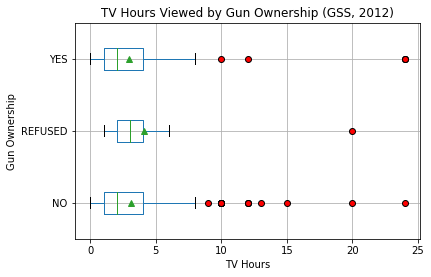

In [54]:
#boxplot of evictions IQR and mean grouped by race
#Changing the outlier markers
red_circle = dict(markerfacecolor='red', marker='o')
df3.boxplot(column='filings_2020', by='racial_majority', vert=False, showmeans=True, flierprops=red_circle)    # by: x axis, column: y axis
#plt.xscale('log')    #playing around with log on boxplot to see if it helps...it reduces outliers but makes it impossible to read TV hours
plt.title('Eviction Filings by Race (Eviction Lab, 2020-2022)')
plt.xlabel('Evictions')
plt.ylabel('Race')
plt.suptitle('')

Text(0.5, 0.98, '')

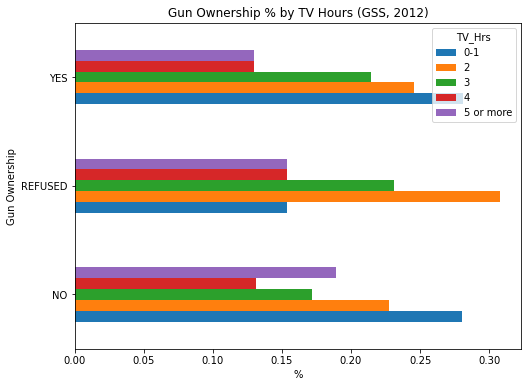

In [55]:
pd.crosstab(values=df_evict['id'],    #prop table/contingency table visualization
            index=df3['racial_majority'],
            columns=df3['filings_2020'],
            aggfunc='count',
            normalize='index').plot(kind='barh', 
                                   figsize=(8, 6), alpha=1,
                                   stacked=False)
plt.title('Evictions % by Race (Eviction Lab, 2020-2022)')
plt.xlabel('% Evictions')
plt.ylabel('Race')
plt.suptitle('')

- ### Evictions and Month
Evictions are assumed to be a year-round activity.  Let us see how the dates confirm or deny this assumption.


In [56]:
pd.crosstab(values=df_evict['id'],    #prop table/contingency table
            index=df_evict['filings_2020'],
            columns=df_evict['month'],
            aggfunc='count',
            normalize='index')    # takes True, 'columns' (each col 100%), 'index' (each row 100%)

sex,Female,Male
owngun,,
NO,0.600476,0.399524
REFUSED,0.500000,0.500000
YES,0.472727,0.527273


Text(0.5, 0.98, '')

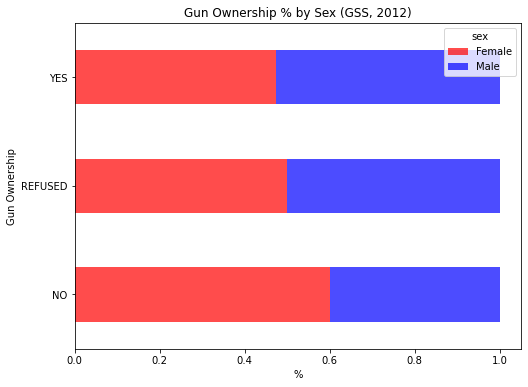

In [57]:
pd.crosstab(values=df_evict['id'],    #prop table/contingency table visualization
            index=df3['filings_2020'],
            columns=df3['month'],
            aggfunc='count',
            normalize='index').plot(kind='barh', 
                                   figsize=(8, 6), alpha=0.7,
                                   stacked=True, color=(['Red', 'Blue']))
plt.title('Evictions % by Month (Eviction Lab, 2020-2022)')
plt.xlabel('%')
plt.ylabel('Month')
plt.suptitle('')

- ### Evictions and Political Party

The relationship between evictions and political party in American society is a contentious one.  With the support of the Republican party, police unions and the  military, a link is usually made between poverty and liberal politics.  Let us see how the data reflected these viewpoints.

In [60]:
pd.crosstab(values=df_evict['id'],    #prop table/contingency table
            index=df_evict['filings_2020'],
            columns=df_evict['party'],
            aggfunc='count',
            normalize='index')    # takes True, 'columns' (each col 100%), 'index' (each row 100%)

party,Democrat,Independent,Republican
owngun,,,
NO,0.545229,0.225527,0.229244
REFUSED,0.173913,0.130435,0.695652
YES,0.367681,0.163934,0.468384


 ## 4.2 Multivariate Analysis <a id=4.2></a>

For the final portion of exploratory analysis, I will explore the strength of relationships between multiple variables.  

- <b> Evictions + County + Race</b><br>
First, I will look at the relationship of eviction filings grouped by county and race.  

In [65]:
import scipy.stats as stats               # a statistical analysis library

In [66]:
df_evict.groupby(['county', 'race'])['filings_2020'].agg(['mean', 'median', 'max', 'min'])         # avg tvhours groupby race and owngun

mean  median   max  min
owngun  race                              
NO      Black  3.910256     3.0  24.0  0.0
        Other  2.869565     2.0  10.0  0.0
        White  2.886029     2.0  15.0  0.0
REFUSED Black  4.000000     4.0   4.0  4.0
        White  4.083333     2.5  20.0  1.0
YES     Black  3.888889     4.0   7.0  1.0
        Other  1.600000     1.5   4.0  0.0
        White  2.897959     2.0  24.0  0.0

## 6. References <a id=6></a>

### Programming References:
Matplotlib Style Sheets Reference.  https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Legend in Matplotlib.  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

Stats t-test in Scipy.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

### Works Cited:


<div class = "alert alert-info">

[Back to top](#7)<br>
    
</div>
<hr>